<a href="https://colab.research.google.com/github/woOONi/LIKELION_AIschool/blob/main/Mini1_%EC%95%84%ED%8C%8C%ED%8A%B8%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_api/miniproject_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import xml.etree.ElementTree as ET

In [ ]:
api_key = #api code

In [ ]:
# 매매가
gu_code = '11350'
deal_Ym = '202212'

# requests로 받아오기
api_document_url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey={api_key}&LAWD_CD={gu_code}&DEAL_YMD={deal_Ym}"
response = requests.get(api_document_url)
response.status_code

200

In [ ]:
df = pd.read_xml(response.text)
# xml 파일을 판다스로 바로 가져올 수 없음
df

,resultCode,resultMsg
0,99,SERVICE KEY IS NOT REGISTERED ERROR.


In [ ]:
# 먼저 xml파일을 읽어보기로함
print(api_document_url)
# 데이터가 중첩된 구조를 가지고 있어서 불러와지지 않는다.

http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey={api_key}&LAWD_CD={gu_code}&DEAL_YMD={deal_Ym}


In [ ]:
# 해결해주기 위해 파이썬 내장함수 xml.etree.ElementTree 를 사용
# 문자열에서 Element로 XML을 직접 구문 분석하기 위해서 fromstring으로 받아온다.
tree = ET.fromstring(response.text)
# 받아온 tree tag, attribute 로 나눠지는데 requests로 받아왔기 때문에 tag는 response, attrib는 {} 로 출력된다.
print(tree.tag,tree.attrib)

response {}


In [ ]:
# 자식노드를 확인하기위해
for child in tree:
    print(child.tag, child.attrib)

# 인덱스로 특정 자식 노드에 액세스할 수 있음
items = tree[1][0]
# item으로 묶여있는 xml을 text를 이용하여 받아서 list를 만든다.
listOfItems = [[i.text for i in item] for item in items]
listOfItems

header {}


In [ ]:
# 받은 리스트를 tag인 부분만 컬럼을 생성
columns  = [i.tag for i in items[0]]

# 받은 데이터를 데이터 프레임으로 생성하고 columns도 지정해주기.
df = pd.DataFrame(items_list, columns=columns)
df

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"58,400",중개거래,1986,2022,마들로,00111,00000,11350,01,0,...,12,5,11350-139,51.48,서울 노원구,13,11350,12,,
1,"58,500",중개거래,1986,2022,마들로,00059,00000,11350,01,0,...,12,5,11350-140,50.14,서울 노원구,13,11350,3,,
2,"61,000",중개거래,1983,2022,광운로2나길,00030,00000,11350,01,0,...,12,12,11350-137,93.38,서울 노원구,436,11350,3,,
3,"51,000",중개거래,1986,2022,마들로,00111,00000,11350,01,0,...,12,15,11350-197,59.22,서울 노원구,13,11350,9,,
4,"70,000",중개거래,2002,2022,마들로,00031,00000,11350,01,0,...,12,23,11350-133,84.97,서울 노원구,18,11350,21,,
5,"65,000",직거래,2002,2022,마들로,00031,00000,11350,01,0,...,12,23,11350-133,84.97,,18,11350,9,,
6,"48,500",중개거래,2003,2022,동일로180길,00048,00009,11350,01,0,...,12,2,11350-211,84.69,서울 노원구,752,11350,8,,
7,"10,800",중개거래,2013,2022,화랑로,00421,00000,11350,02,0,...,12,2,11350-2019,14.925,서울 노원구,683-14,11350,18,,
8,"36,300",직거래,1994,2022,섬밭로,00123,00000,11350,01,0,...,12,8,11350-173,34.44,,715,11350,2,,
9,"69,600",중개거래,2000,2022,노원로1가길,00010,00000,11350,01,0,...,12,10,11350-180,84.65,서울 노원구,91,11350,4,,


In [ ]:
# 매매가 불러오는 함수
def aptTrade(gu_code, deal_Ym):
    '''
    매매가 데이터 프레임 만들기
    1. 매매가 api url 불러오기
    2. requests로 응답받기
    3. 파이썬 내장함수를 사용하여 내용 받기
    4. item내용 받기
    5. 받은 내용에서 컬럼값 리스트 생성
    6. 내용과 컬럼값 리스트를 이용하여 데이터 프레임 생성
    7. 프레임에서 필요한 컬럼만 가지고 오게 설정
    '''
    url = f"http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey={api_key}&LAWD_CD={gu_code}&DEAL_YMD={deal_Ym}"
    response = requests.get(url)
    tree = ET.fromstring(response.content)
    items = tree[1][0]
    columns = [i.tag for i in items[1]]
    items_list = [[i.text for i in item] for item in items]
    df = pd.DataFrame(items_list, columns=columns)
    return df

In [ ]:
df = aptTrade(11680, '202210')
df

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"300,000",중개거래,2022,2022,역삼동,강남센트럴아이파크,10,6,84.915,"서울 강남구, 서울 송파구",902,11680,8,,
1,"41,000",중개거래,2001,2022,역삼동,한화진넥스빌,10,11,41.68,서울 강남구,706-20,11680,9,,
2,"34,000",중개거래,2002,2022,역삼동,대우디오빌,10,14,30.03,서울 강남구,720-25,11680,14,23.01.25,O
3,"185,000",중개거래,2019,2022,개포동,래미안블레스티지,10,8,59.967,서울 강남구,1280,11680,7,,
4,"122,000",중개거래,1992,2022,개포동,삼익대청아파트,10,18,60,서울 강남구,12,11680,10,,
5,"88,000",중개거래,1992,2022,개포동,성원대치2단지아파트,10,18,33.18,서울 강남구,12,11680,8,,
6,"294,000",중개거래,1999,2022,청담동,청담현대3차아파트,10,17,109.53,서울 강남구,127-31,11680,5,,
7,"352,000",중개거래,2008,2022,삼성동,삼성동힐스테이트 1단지,10,12,114.463,서울 강남구,16-2,11680,1,,
8,"129,000",직거래,2007,2022,삼성동,채널리저브,10,25,84.94,,144-14,11680,12,,
9,"37,500",중개거래,2004,2022,삼성동,LG선릉에클라트(B),10,28,36.35,서울 강남구,142-3,11680,15,,


### 법정동 코드 api 받기
- 동 코드를 받기 위해 서울 열린 데이터 광장에서 서울시 건축물 대장 법정동 코드정보 api를 받아 법정동 코드를 받음

In [ ]:
# 서울 열린 데이터 광장에서 서울시 건축물대장 법정동 코드정보 api 받아서 사용
gu_api_key = #api code

# url 준비
url = f'http://openapi.seoul.go.kr:8088/{gu_api_key}/xml/bigCmpBjdongMgmInfo/1/999/'

# get으로 api 받기
response = requests.get(url)
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<bigCmpBjdongMgmInfo>\n<list_total_count>2355</list_total_count>\n<RESULT>\n<CODE>INFO-000</CODE>\n<MESSAGE>정상 처리되었습니다</MESSAGE>\n</RESULT>\n<row>\n<SIGUNGU_CD>11680</SIGUNGU_CD>\n<BJDONG_CD>10600</BJDONG_CD>\n<HJDONG_CD>675</HJDONG_CD>\n<SIDO_NM>서울특별시</SIDO_NM>\n<SIGUNGU_NM>강남구</SIGUNGU_NM>\n<BJDONG_NM>대치동</BJDONG_NM>\n<HJDONG_NM>개포3동</HJDONG_NM>\n<APPLY_STRT_DAY>20221223</APPLY_STRT_DAY>\n<APPLY_EXP_DAY>99991231</APPLY_EXP_DAY>\n</row>\n<row>\n<SIGUNGU_CD>11680</SIGUNGU_CD>\n<BJDONG_CD>11400</BJDONG_CD>\n<HJDONG_CD>675</HJDONG_CD>\n<SIDO_NM>서울특별시</SIDO_NM>\n<SIGUNGU_NM>강남구</SIGUNGU_NM>\n<BJDONG_NM>일원동</BJDONG_NM>\n<HJDONG_NM>개포3동</HJDONG_NM>\n<APPLY_STRT_DAY>20221223</APPLY_STRT_DAY>\n<APPLY_EXP_DAY>99991231</APPLY_EXP_DAY>\n</row>\n<row>\n<SIGUNGU_CD>11680</SIGUNGU_CD>\n<BJDONG_CD>10300</BJDONG_CD>\n<HJDONG_CD>675</HJDONG_CD>\n<SIDO_NM>서울특별시</SIDO_NM>\n<SIGUNGU_NM>강남구</SIGUNGU_NM>\n<BJDONG_NM>개포동</BJDONG_NM>\n<HJDONG_NM>개포3동</HJDONG_NM>\n<APP

In [ ]:
# 판다스로 xml 파일 받기
df_list_all = pd.read_xml(response.text)
df_list_all

,list_total_count,CODE,MESSAGE,SIGUNGU_CD,BJDONG_CD,HJDONG_CD,SIDO_NM,SIGUNGU_NM,BJDONG_NM,HJDONG_NM,APPLY_STRT_DAY,APPLY_EXP_DAY
0,2355.0,None,None,NaN,NaN,NaN,None,None,None,None,NaN,NaN
1,NaN,INFO-000,정상 처리되었습니다,NaN,NaN,NaN,None,None,None,None,NaN,NaN
2,NaN,None,None,11680.0,10600.0,675.0,서울특별시,강남구,대치동,개포3동,20221223.0,99991231.0
3,NaN,None,None,11680.0,11400.0,675.0,서울특별시,강남구,일원동,개포3동,20221223.0,99991231.0
4,NaN,None,None,11680.0,10300.0,675.0,서울특별시,강남구,개포동,개포3동,20221223.0,99991231.0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,NaN,None,None,11110.0,17900.0,580.0,서울특별시,종로구,홍파동,교남동,19880423.0,99991231.0
997,NaN,None,None,11110.0,18000.0,580.0,서울특별시,종로구,교북동,교남동,19880423.0,99991231.0
998,NaN,None,None,11110.0,18100.0,580.0,서울특별시,종로구,행촌동,교남동,19880423.0,99991231.0
999,NaN,None,None,11110.0,14600.0,600.0,서울특별시,종로구,가회동,가회동,19880423.0,99991231.0


In [ ]:
# 필요한 것이 시구군 코드와 구 이름이기 때문에 그거만 가져오기
# 결측치 제거, 동코드는 구코드가 같기 때문에 drop_duplicate()로 중복값 삭제
df_gu_code = df_list_all[['SIGUNGU_CD','SIGUNGU_NM']].dropna().drop_duplicates()

# index를 새로 설정하기
df_gu_code = df_gu_code.reset_index(drop=True)

# 구코드가 float 형태로 되어 있기 때문에 정수형으로 바꿔주기
df_gu_code['SIGUNGU_CD'] = df_gu_code['SIGUNGU_CD'].astype('int')
df_gu_code['SIGUNGU_CD'] = df_gu_code['SIGUNGU_CD'].astype('str')
df_gu_code

,SIGUNGU_CD,SIGUNGU_NM
0,11680,강남구
1,11740,강동구
2,11290,성북구
3,11530,구로구
4,11305,강북구
5,11410,서대문구
6,11500,강서구
7,11440,마포구
8,11710,송파구
9,11230,동대문구


In [ ]:
from tqdm import trange
import time

def deal_Ym_aptTrade(deal_Ym):
    df_list = []
    for i in trange(0, len(df_gu_code)):
        gu_name = df_gu_code['SIGUNGU_NM'][i]
        gu_code = df_gu_code['SIGUNGU_CD'][i]
        df = aptTrade(gu_code, deal_Ym)
        df['법정구'] = gu_name
        df_list.append(df)
    df_ym = pd.concat(df_list, ignore_index = True)
    return df_ym

In [ ]:
# 2022년 12월 서울시 아파트 매매 거래가 확인
df_202212 = deal_Ym_aptTrade('202211')
df_202212

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.88it/s]


,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
0,"85,000",중개거래,2003,2022,역삼동,리츠빌아파트,11,16,93.22,서울 강남구,787-4,11680,4,,,강남구
1,"408,000",중개거래,2022,2022,역삼동,강남센트럴아이파크,11,16,125.462,서울 강남구,902,11680,18,,,강남구
2,"134,000",중개거래,1992,2022,개포동,삼익대청아파트,11,14,60,"서울 강남구, 서울 서초구",12,11680,7,,,강남구
3,"102,500",중개거래,1992,2022,개포동,성원대치2단지아파트,11,15,39.53,서울 강남구,12,11680,3,,,강남구
4,"84,700",중개거래,1992,2022,개포동,성원대치2단지아파트,11,16,33.18,서울 강남구,12,11680,13,,,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,"92,500",중개거래,2020,2022,신월동,목동센트럴아이파크위브2단지,11,20,84.97,서울 양천구,1076,11470,10,,,양천구
744,"40,000",중개거래,2002,2022,신월동,새롬,11,21,84.83,서울 양천구,458-1,11470,1,,,양천구
745,"50,000",중개거래,2003,2022,신월동,보람쉬움1,11,21,58.15,서울 양천구,416-1,11470,13,,,양천구
746,"41,000",중개거래,2002,2022,신월동,세아쎄닛빌,11,22,66.9,서울 양천구,547-5,11470,9,,,양천구


In [ ]:
# 2022년 10월부터 12월까지 3개월동안의 서울시 아파트 매매 거래가 확인

ym_list = ['202210', '202211', '202212']
df_list_3m = []

for ym in ym_list:
    tmp = deal_Ym_aptTrade(ym)
    df_list_3m.append(tmp)

df_apt_3 = pd.concat(df_list_3m, ignore_index = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.93it/s]


In [ ]:
df_apt_3

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
0,"300,000",중개거래,2022,2022,역삼동,강남센트럴아이파크,10,6,84.915,"서울 강남구, 서울 송파구",902,11680,8,,,강남구
1,"41,000",중개거래,2001,2022,역삼동,한화진넥스빌,10,11,41.68,서울 강남구,706-20,11680,9,,,강남구
2,"34,000",중개거래,2002,2022,역삼동,대우디오빌,10,14,30.03,서울 강남구,720-25,11680,14,23.01.25,O,강남구
3,"185,000",중개거래,2019,2022,개포동,래미안블레스티지,10,8,59.967,서울 강남구,1280,11680,7,,,강남구
4,"122,000",중개거래,1992,2022,개포동,삼익대청아파트,10,18,60,서울 강남구,12,11680,10,,,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,"87,000",중개거래,2020,2022,신월동,목동센트럴아이파크위브3단지,12,12,84.98,서울 양천구,1077,11470,9,,,양천구
2198,"45,000",중개거래,2004,2022,신월동,신도브래뉴2차,12,16,107.04,서울 양천구,1031,11470,8,,,양천구
2199,"35,000",직거래,1987,2022,신월동,길훈,12,22,49.77,,341-1,11470,1,,,양천구
2200,"86,000",중개거래,2020,2022,신월동,목동센트럴아이파크위브2단지,12,24,84.97,서울 양천구,1076,11470,13,,,양천구


In [ ]:
df_apt_3.to_csv('202210_202212_aptTrade_Seoul.csv',index=False)

In [ ]:
pd.read_csv('202210_202212_aptTrade_Seoul.csv')

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
0,"300,000",중개거래,2022,2022,역삼동,강남센트럴아이파크,10,6,84.915,"서울 강남구, 서울 송파구",902,11680,8,,,강남구
1,"41,000",중개거래,2001,2022,역삼동,한화진넥스빌,10,11,41.680,서울 강남구,706-20,11680,9,,,강남구
2,"34,000",중개거래,2002,2022,역삼동,대우디오빌,10,14,30.030,서울 강남구,720-25,11680,14,23.01.25,O,강남구
3,"185,000",중개거래,2019,2022,개포동,래미안블레스티지,10,8,59.967,서울 강남구,1280,11680,7,,,강남구
4,"122,000",중개거래,1992,2022,개포동,삼익대청아파트,10,18,60.000,서울 강남구,12,11680,10,,,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,"87,000",중개거래,2020,2022,신월동,목동센트럴아이파크위브3단지,12,12,84.980,서울 양천구,1077,11470,9,,,양천구
2198,"45,000",중개거래,2004,2022,신월동,신도브래뉴2차,12,16,107.040,서울 양천구,1031,11470,8,,,양천구
2199,"35,000",직거래,1987,2022,신월동,길훈,12,22,49.770,,341-1,11470,1,,,양천구
2200,"86,000",중개거래,2020,2022,신월동,목동센트럴아이파크위브2단지,12,24,84.970,서울 양천구,1076,11470,13,,,양천구


### 데이터 확인

In [ ]:
df_apt_3.shape

(2202, 16)

### 결측치 확인

In [ ]:
# 결측치 확인
df_apt_3.isnull().sum()

거래금액       0
거래유형       0
건축년도       0
년          0
법정동        0
아파트        0
월          0
일          0
전용면적       0
중개사소재지     0
지번         0
지역코드       0
층          0
해제사유발생일    0
해제여부       0
법정구        0
dtype: int64

### 데이터 중복값 확인

In [ ]:
df_apt_3.duplicated().sum()

172

In [ ]:
df_apt_3[df_apt_3.duplicated()]

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
412,"14,000",중개거래,2016,2022,상도동,상도휴엔하임,10,24,14.7,서울 동작구,363-164,11590,6,,,동작구
657,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,3,,,성북구
658,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,2,,,성북구
659,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,3,,,성북구
1042,"12,000",직거래,2018,2022,갈현동,유호루하스,11,18,16.768,,548,11380,7,,,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,"25,750",직거래,2022,2022,화양동,더메종건대,12,23,17.78,,23-5,11215,10,,,광진구
2093,"25,750",직거래,2022,2022,화양동,더메종건대,12,23,17.78,,23-5,11215,11,,,광진구
2095,"20,950",직거래,2022,2022,화양동,더메종건대,12,23,14.63,,23-5,11215,12,,,광진구
2097,"22,750",직거래,2022,2022,화양동,더메종건대,12,23,17.78,,23-5,11215,5,,,광진구


In [ ]:
df_apt_3[(df_apt_3['아파트']=='(160-16)')]

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
655,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,2,,,성북구
656,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,3,,,성북구
657,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,3,,,성북구
658,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,2,,,성북구
659,"11,300",직거래,2017,2022,안암동5가,(160-16),11,28,22.72,,160-16,11290,3,,,성북구
660,"11,300",직거래,2017,2022,안암동5가,(160-16),11,30,22.72,,160-16,11290,3,,,성북구
661,"11,300",직거래,2017,2022,안암동5가,(160-16),11,30,22.72,,160-16,11290,1,,,성북구


In [ ]:
df_apt_3.drop_duplicates()

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
0,"300,000",중개거래,2022,2022,역삼동,강남센트럴아이파크,10,6,84.915,"서울 강남구, 서울 송파구",902,11680,8,,,강남구
1,"41,000",중개거래,2001,2022,역삼동,한화진넥스빌,10,11,41.68,서울 강남구,706-20,11680,9,,,강남구
2,"34,000",중개거래,2002,2022,역삼동,대우디오빌,10,14,30.03,서울 강남구,720-25,11680,14,23.01.25,O,강남구
3,"185,000",중개거래,2019,2022,개포동,래미안블레스티지,10,8,59.967,서울 강남구,1280,11680,7,,,강남구
4,"122,000",중개거래,1992,2022,개포동,삼익대청아파트,10,18,60,서울 강남구,12,11680,10,,,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,"87,000",중개거래,2020,2022,신월동,목동센트럴아이파크위브3단지,12,12,84.98,서울 양천구,1077,11470,9,,,양천구
2198,"45,000",중개거래,2004,2022,신월동,신도브래뉴2차,12,16,107.04,서울 양천구,1031,11470,8,,,양천구
2199,"35,000",직거래,1987,2022,신월동,길훈,12,22,49.77,,341-1,11470,1,,,양천구
2200,"86,000",중개거래,2020,2022,신월동,목동센트럴아이파크위브2단지,12,24,84.97,서울 양천구,1076,11470,13,,,양천구


중복값을 확인해본 결과 건축년도가 2022년이라 매물이 많이 올라온 아파트가 많아 중복 될 수가 있으며 새로지어진 집 외에 것은 여러개를 올린 경우임으로 확인되어져서 중복값을 과감히 제거하였다.

### 요약

In [ ]:
# 요약
df_apt_3.describe()

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
count,2202,2202,2202,2202,2202,2202,2202,2202,2202,2202,2202,2202,2202,2202,2202,2202
unique,635,2,50,1,216,997,3,31,973,101,941,25,42,34,2,25
top,"100,000",중개거래,2022,2022,독산동,아이유하임,12,23,29.0615,,1162,11710,3,,,송파구
freq,32,1722,321,2202,153,135,882,240,135,481,135,185,172,2120,2120,185


In [ ]:
# 데이터 형식이 object로만 나와서 거래금액과 적용 면적, 건축년도, 년,월,일을 float으로 바꿔주기로함
int_cols = ['거래금액', '건축년도', '년', '월', '일', '층']
float_cols = ['전용면적']
for col in int_cols:
    if col in df_apt_3.columns:
        df_apt_3[col] = pd.to_numeric(df_apt_3[col].apply(
            lambda x: x.strip().replace(",", "") if x is not None and not pd.isnull(x) else x)).astype("Int64")
for col in float_cols:
    if col in df.columns:
        df_apt_3[col] = pd.to_numeric(df_apt_3[col])

In [ ]:
df_apt_3

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
0,300000,중개거래,2022,2022,역삼동,강남센트럴아이파크,10,6,84.915,"서울 강남구, 서울 송파구",902,11680,8,,,강남구
1,41000,중개거래,2001,2022,역삼동,한화진넥스빌,10,11,41.680,서울 강남구,706-20,11680,9,,,강남구
2,34000,중개거래,2002,2022,역삼동,대우디오빌,10,14,30.030,서울 강남구,720-25,11680,14,23.01.25,O,강남구
3,185000,중개거래,2019,2022,개포동,래미안블레스티지,10,8,59.967,서울 강남구,1280,11680,7,,,강남구
4,122000,중개거래,1992,2022,개포동,삼익대청아파트,10,18,60.000,서울 강남구,12,11680,10,,,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,87000,중개거래,2020,2022,신월동,목동센트럴아이파크위브3단지,12,12,84.980,서울 양천구,1077,11470,9,,,양천구
2198,45000,중개거래,2004,2022,신월동,신도브래뉴2차,12,16,107.040,서울 양천구,1031,11470,8,,,양천구
2199,35000,직거래,1987,2022,신월동,길훈,12,22,49.770,,341-1,11470,1,,,양천구
2200,86000,중개거래,2020,2022,신월동,목동센트럴아이파크위브2단지,12,24,84.970,서울 양천구,1076,11470,13,,,양천구


In [ ]:
df_apt_3.describe()

,거래금액,건축년도,년,월,일,전용면적,층
count,2202.000000,2202.000000,2202.0,2202.000000,2202.000000,2202.000000,2202.000000
mean,83032.881471,2006.905540,2022.0,11.140781,16.585831,62.956138,9.431426
std,74371.047195,12.216143,0.0,0.800488,8.605448,35.375552,6.511031
min,7000.000000,1970.000000,2022.0,10.000000,1.000000,11.790000,1.000000
25%,33950.000000,1999.000000,2022.0,10.000000,9.000000,29.061500,4.000000
50%,67000.000000,2008.000000,2022.0,11.000000,17.000000,59.960000,8.000000
75%,105000.000000,2018.000000,2022.0,12.000000,23.000000,84.910000,13.000000
max,945000.000000,2022.000000,2022.0,12.000000,31.000000,258.280000,44.000000


### 데이터 분석

#### 서울시에서 가장 비싼 집은?

In [ ]:
df_apt_3[df_apt_3['거래금액'] == df_apt_3['거래금액'].describe()['max']]

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
1031,945000,중개거래,2019,2022,한남동,나인원한남,11,7,206.8953,서울 용산구,829,11170,8,,,용산구


#### 3개월 동안 매물이 가장 많이 올라오는 구

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 시각화를 위한 폰트 설정
import os

if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

# 레티나 설정을 해주면 글씨가 좀더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format='retina'

Text(0.5, 1.0, '서울시 법정구별 3개월 매물이 가장 많이 올라온 곳')

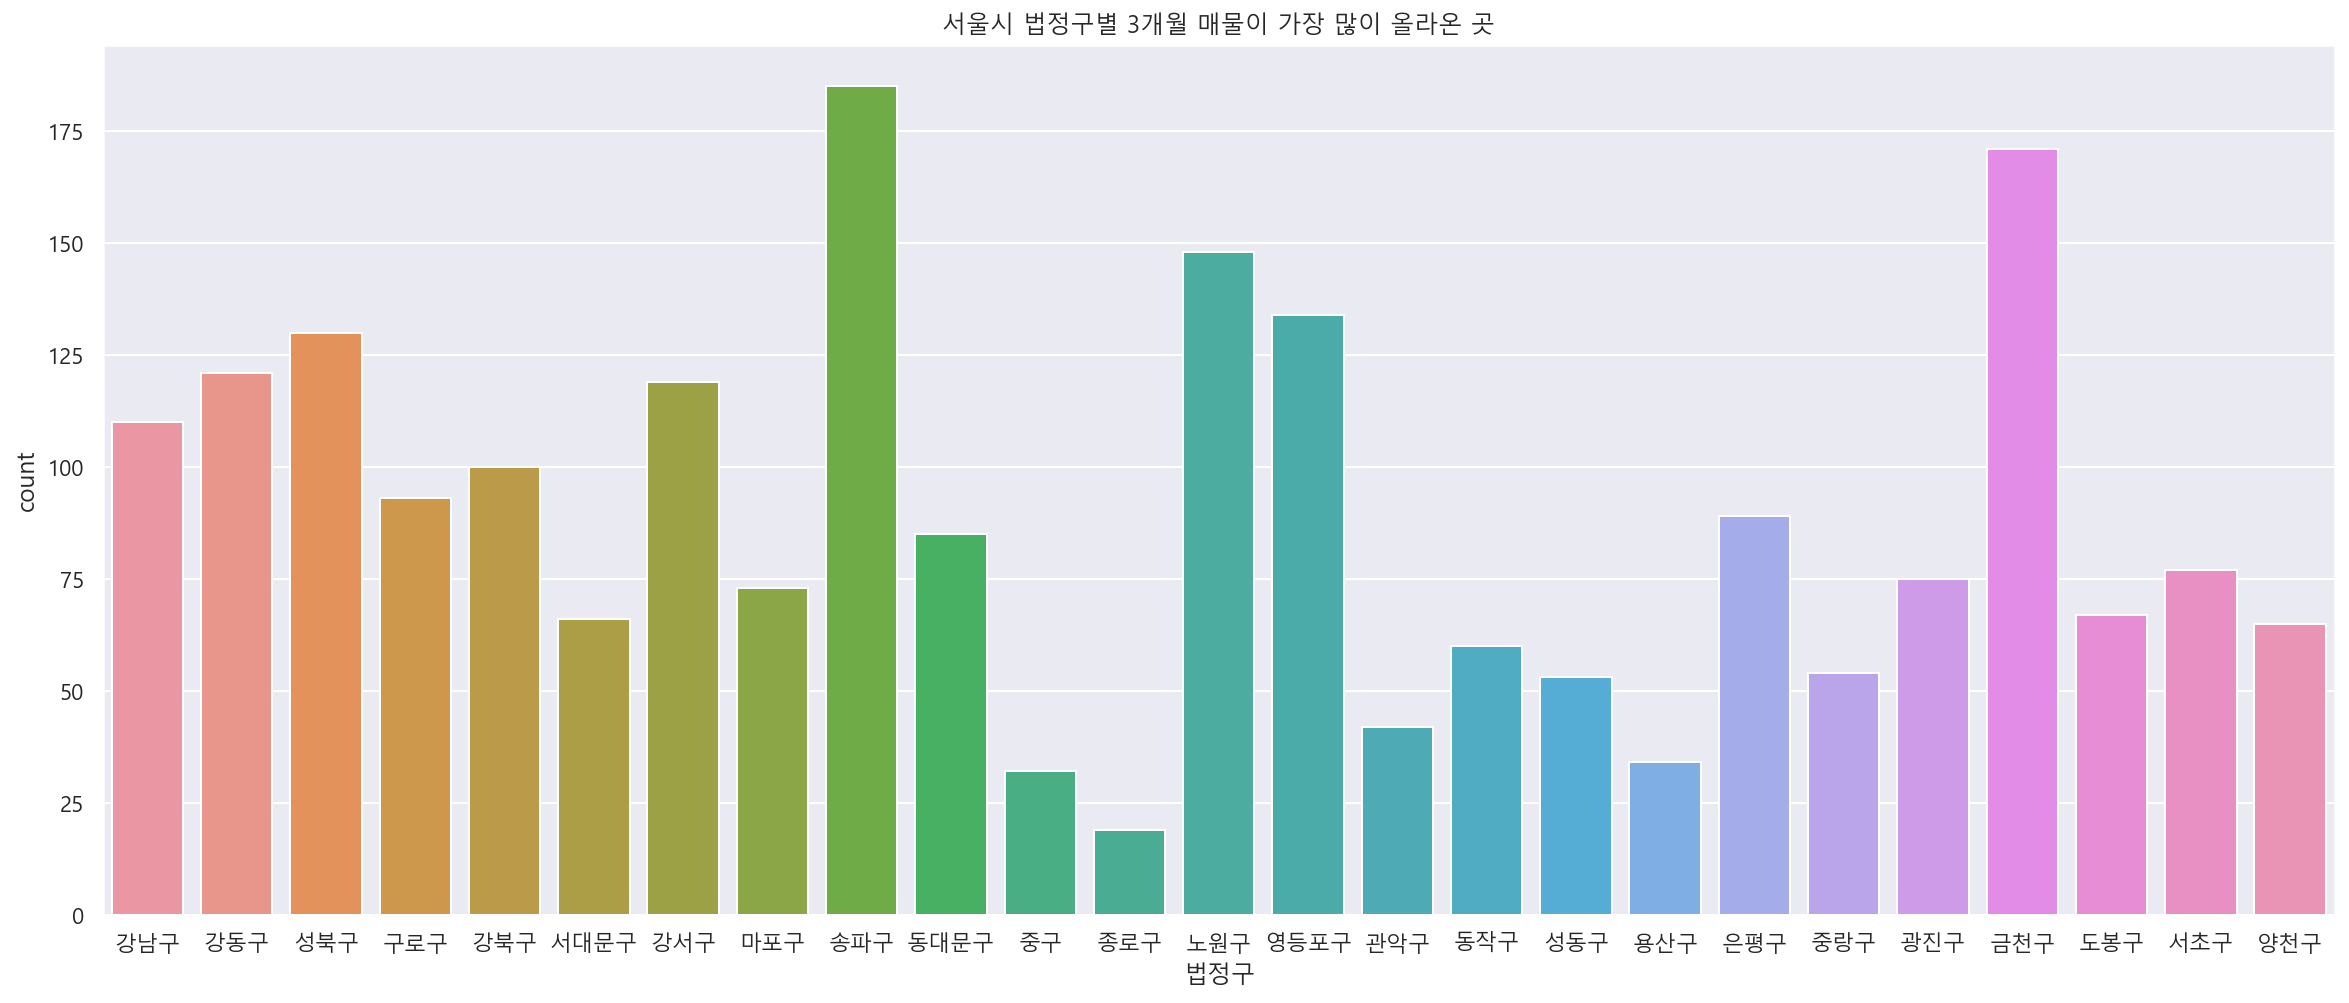

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_apt_3, x = "법정구")
plt.title('서울시 법정구별 3개월 매물이 가장 많이 올라온 곳')

#### 서울시 구당 평균 매매가격은?

In [ ]:
df_gu_trade_mean = df_apt_3.groupby("법정구")['거래금액'].mean().copy()
display(df_gu_trade_mean)

법정구
강남구     191442.590909
강동구      90449.173554
강북구           31299.5
강서구      69483.109244
관악구      52188.095238
광진구          53701.56
구로구      49983.870968
금천구      37050.818713
노원구      57524.662162
도봉구      48573.134328
동대문구     67899.117647
동작구           80535.0
마포구     100354.794521
서대문구     75947.863636
서초구      198370.25974
성동구     106774.528302
성북구           58760.0
송파구     155730.124324
양천구      89165.384615
영등포구     63900.223881
용산구     177445.588235
은평구      53284.775281
종로구      31381.578947
중구        62816.59375
중랑구      44453.703704
Name: 거래금액, dtype: Float64

Text(0.5, 1.0, '서울시 법정구별 평균 매매가격')

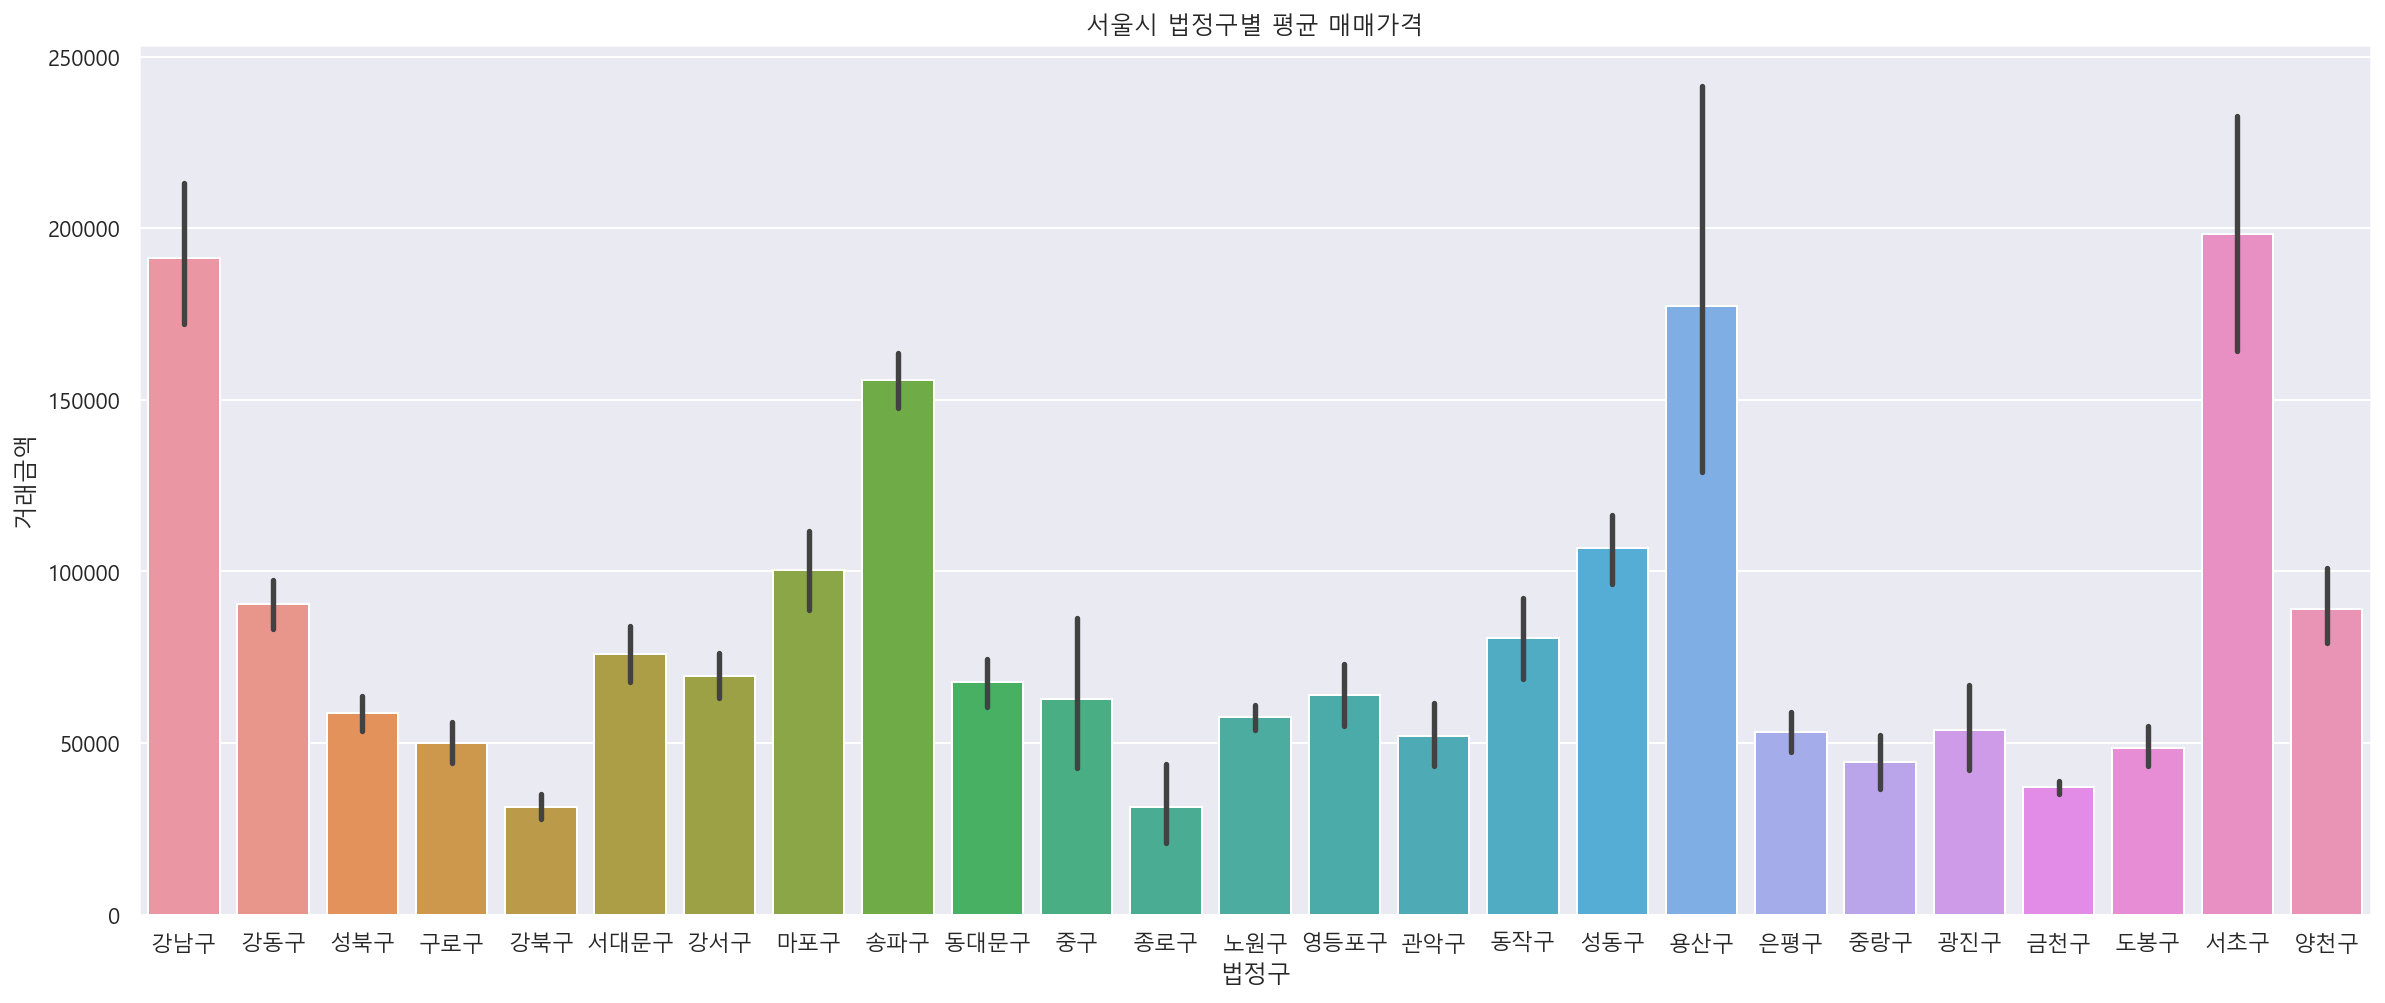

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_apt_3, x="법정구", y="거래금액")
plt.title('서울시 법정구별 평균 매매가격')

#### 서울시 가장 넓은 집의 가격은?

In [ ]:
df_apt_3[df_apt_3['전용면적'] == df_apt_3['전용면적'].describe()['max']]

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부,법정구
1764,260000,중개거래,2002,2022,오금동,르네상스빌,12,1,258.28,서울 강동구,45,11710,19,,,송파구
